In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix
%matplotlib inline

In [239]:
dataset=pd.read_csv('NKE.csv')

In [240]:
dataset.shape

(1090, 13)

In [241]:
dataset.head()

,Date,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
0,28-12-2017,63.00,63.32,62.85,62.95,3987151,0.0,1,61.646615,61.959740,61.499837,61.597689,3987151
1,27-12-2017,63.56,63.60,62.77,62.95,8959745,0.0,1,62.194585,62.233725,61.421556,61.597689,8959745
2,26-12-2017,62.90,63.89,62.81,63.65,4563475,0.0,1,61.548763,62.517495,61.460696,62.282651,4563475
3,22-12-2017,61.21,63.54,60.13,63.29,20413895,0.0,1,59.895068,62.175014,58.838269,61.930385,20413895
4,21-12-2017,64.33,64.98,63.30,64.77,14312589,0.0,1,62.948043,63.584080,61.940170,63.378591,14312589


In [242]:
dataset.isnull().any()

Date          False
Open          False
High          False
Low           False
Close         False
Volume        False
Dividend      False
Split         False
Adj_Open      False
Adj_High      False
Adj_Low       False
Adj_Close     False
Adj_Volume    False
dtype: bool

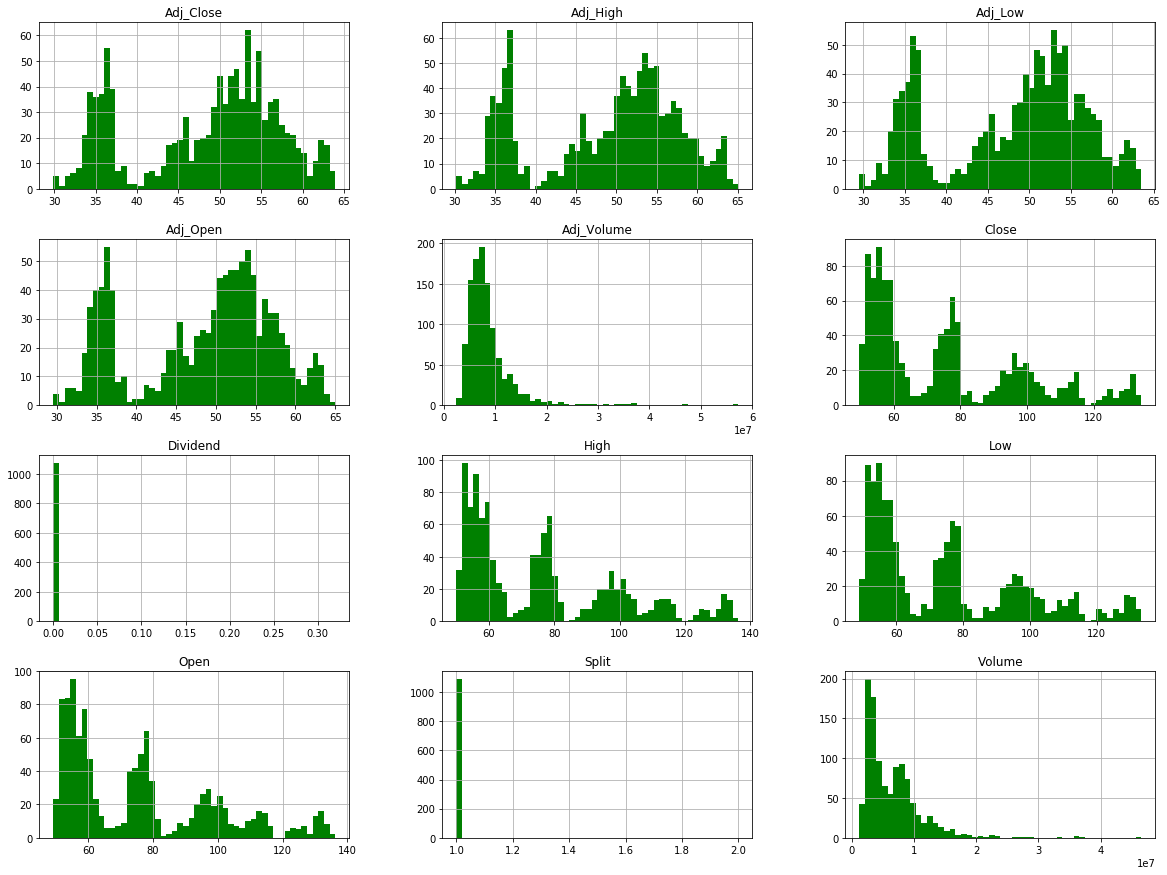

In [243]:
dataset.hist(bins=50,figsize=(20,15),color='green')
plt.show()

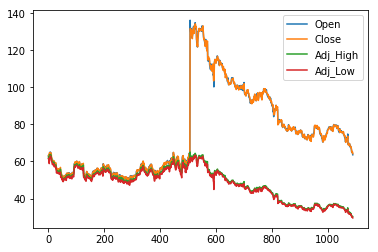

In [244]:
x=dataset['Open']
y=dataset['Close']
plt.plot(x,label='Open')
plt.plot(y,label='Close')
m=dataset['Adj_High']
n=dataset['Adj_Low']
plt.plot(m,label='Adj_High')
plt.plot(n,label='Adj_Low')
plt.legend()
plt.show()

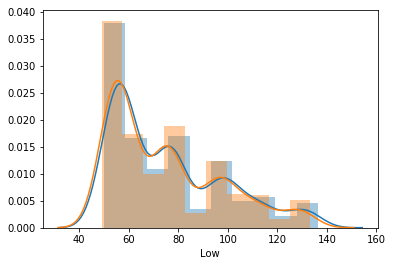

In [245]:
sns.distplot(dataset['High'],kde=True,bins=10)
sns.distplot(dataset['Low'],kde=True,bins=10)#both the kde's ovelapped hence teh aveage of both High  and Low lie in similar range

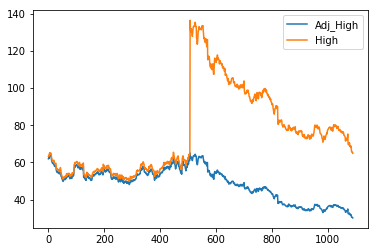

In [246]:
m=dataset['Adj_High']
n=dataset['High']
plt.plot(m,label='Adj_High')
plt.plot(n,label='High')
plt.legend()
plt.show()

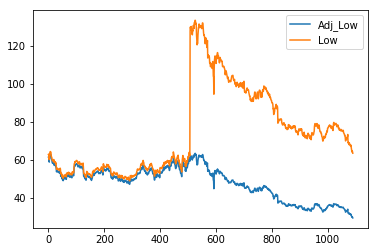

In [247]:
m=dataset['Adj_Low']
n=dataset['Low']
plt.plot(m,label='Adj_Low')
plt.plot(n,label='Low')
plt.legend()
plt.show()

In [248]:
forecast=int(input())


20


In [249]:
dataset=dataset[['Adj_Close']]
print(dataset.head())

   Adj_Close
0  61.597689
1  61.597689
2  62.282651
3  61.930385
4  63.378591


In [250]:
dataset['Prediction']= dataset[['Adj_Close']].shift(-forecast)

In [251]:
print(dataset.tail())

      Adj_Close  Prediction
1085  30.408609         NaN
1086  30.213325         NaN
1087  30.399310         NaN
1088  30.283069         NaN
1089  29.892500         NaN


In [252]:
X = np.array(dataset.drop(['Prediction'],1))


In [253]:
dataset.describe()

,Adj_Close,Prediction
count,1090.000000,1070.000000
mean,48.423478,48.185288
std,8.722355,8.622627
min,29.892500,29.892500
25%,40.991540,38.798969
50%,50.690086,50.501232
75%,54.728316,54.590860
max,63.938307,63.938307


In [254]:
X = X[:-forecast]

In [255]:
Y = np.array(dataset['Prediction'])

In [256]:
Y = Y[:-forecast]

In [257]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [258]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train)

svm_confidence = svr_rbf.score(x_test, y_test)
print("svm confidence: ", svm_confidence*100,"%")

svm confidence:  91.9989168437355 %


In [259]:
linear_reg = LinearRegression()
# Train the model
linear_reg.fit(x_train, y_train)

linear_confidence = linear_reg.score(x_test, y_test)
print("linear regression  confidence: ", linear_confidence)



linear regression  confidence:  0.9029319855600112


In [260]:
x_forecast = np.array(dataset.drop(['Prediction'],1))[-forecast:]

print(x_forecast)



[[33.77494459]
 [34.23990803]
 [32.70552867]
 [32.04528058]
 [32.28241193]
 [32.07317838]
 [32.25451413]
 [32.31495937]
 [32.3056601 ]
 [31.76630251]
 [31.70585726]
 [31.5756675 ]
 [31.65471128]
 [31.4268792 ]
 [31.06885734]
 [30.40860925]
 [30.21332461]
 [30.39930998]
 [30.28306912]
 [29.89249983]]


In [261]:
linear_reg_prediction = linear_reg.predict(x_forecast)
print('Linear Model Prediction is :',linear_reg_prediction)

Linear Model Prediction is : [33.75838282 34.20513307 32.73085724 32.09647188 32.3243145  32.12327689
 32.29750949 32.35558702 32.34665201 31.82842172 31.77034419 31.64525412
 31.72120166 31.50229404 31.15829634 30.52391098 30.33627588 30.51497597
 30.40328841 30.0280182 ]


In [262]:
svm_prediction = svr_rbf.predict(x_forecast)
print("SVM MODEL prediction is :")
print(svm_prediction)

SVM MODEL prediction is :
[36.0063955  35.39547163 35.70795238 34.05339162 34.73037518 34.13551767
 34.65394127 34.81811348 34.79321004 33.22781206 33.053542   32.6924588
 32.90903251 32.3137868  31.62650352 31.54521698 31.85654671 31.55657212
 31.72794302 32.68223564]


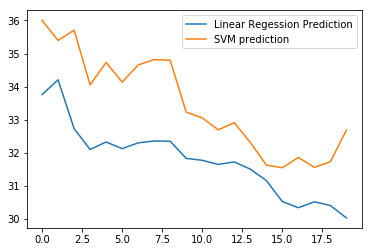

In [263]:
m=linear_reg_prediction
n=svm_prediction
plt.plot(m,label='Linear Regession Prediction')
plt.plot(n,label='SVM prediction')
plt.legend()
plt.show()